<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2021/blob/main/seminar07/MLatFIAN2021_seminar07_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [2]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

This data contains 2 spacial features: `['Longitude', 'Latitude']`:

In [15]:
import numpy as np
a = [1,2,1,1,1,3]
len(np.unique(data.target))

3842

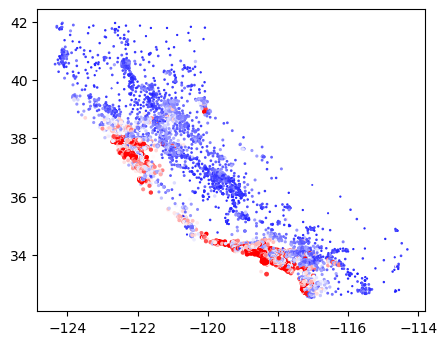

In [8]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr');

(Compare this plot with the map of California: https://en.wikipedia.org/wiki/California)

A kNN model might be quite reasonable to use on this 2D subspace.

Let's first divide our data into train and test:

In [39]:
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train[['Longitude','Latitude']]

(15480, 8) (5160, 8) (15480,) (5160,)


,Longitude,Latitude
9101,-117.93,34.57
16450,-121.28,38.14
10247,-117.86,33.89
664,-122.14,37.70
3198,-119.65,36.37
...,...,...
8222,-118.23,33.76
9449,-119.85,37.39
8471,-118.32,33.91
17048,-122.27,37.47


# Task 1

 - Build a kNN regressor on the `Longitude` and `Latitude` features
 - Build a random forest regressor on the rest of the features
 - Build a stacking regressor (`sklearn.ensemble.StackingRegressor`) with 5-fold cross-val-predict using the two models above as the base models and a linear regression model as the final (aggregating) estimator
 - Compare the test MSE losses of the 3 models above
 

Make sure to have a look at the documentation: 
https://scikit-learn.org/stable/modules/ensemble.html#stacking

You can make a pipeline (`sklearn.pipeline.make_pipeline`) with a `ColumnTransformer` (`sklearn.compose.make_column_transformer`) and a regression model (knn or random forest), where the `ColumnTransformer` will select the desired columns from the dataset (see the docs for the column transformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

# kNN

In [41]:
features_train = X_train[['Longitude','Latitude']]
features_test = X_test[['Longitude','Latitude']]

model = KNeighborsRegressor(n_neighbors=5)
model.fit(features_train, y_train)
test_predictions = model.predict(features_test)

print(mean_squared_error(y_test,test_predictions))


0.3009814178451643


Посмотрим, как зависит результат от числа ближайших соседей (гиперпараметра модели)

100%|██████████| 24/24 [00:01<00:00, 14.42it/s]


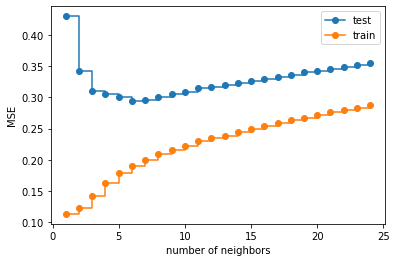

In [51]:
from tqdm import tqdm
MSE_train = []
MSE_test = []
for j in tqdm(range(1,25)):
    model = KNeighborsRegressor(n_neighbors=j)
    model.fit(features_train, y_train)
    train_predictions = model.predict(features_train)
    test_predictions = model.predict(features_test)

    MSE_test.append(mean_squared_error(y_test,test_predictions))
    MSE_train.append(mean_squared_error(y_train,train_predictions))
plt.plot(np.arange(1,25), np.array(MSE_test),marker='o', drawstyle="steps-post",label = 'test')
plt.plot(np.arange(1,25), np.array(MSE_train),marker='o', drawstyle="steps-post",label = 'train')
plt.xlabel("number of neighbors")
plt.ylabel("MSE")
plt.legend()
    
    

Как видно, MSE предсказания порядка 0.3-0.35.

Для Stacking Regressor необходима модель kNN с использованием column_transformer.

In [61]:
columnTransformer_knn = make_column_transformer(('passthrough',['Longitude','Latitude']))
model_knn = make_pipeline(
    columnTransformer_knn,
    KNeighborsRegressor(n_neighbors=5)
)

# Random Forest

In [58]:
columnTransformer_rf = make_column_transformer(('drop',['Longitude','Latitude']),remainder = 'passthrough')
model_rf = make_pipeline(
    columnTransformer_rf,
    RandomForestRegressor(n_estimators=100,max_depth=5)
)
model_rf.fit(X_train, y_train)
test_predictions = model_rf.predict(X_test)

print(mean_squared_error(y_test,test_predictions))


0.49352665976892157


Предсказание лучше, чем у kNN.

# Stacking Regressor

In [67]:
estimators = [('knn', model_knn),
              ('RandForest', model_rf)]
               
model_sr = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)

model_sr.fit(X_train, y_train)
test_predictions = model_sr.predict(X_test)

print(mean_squared_error(y_test,test_predictions))


0.23521399050675698


Таким образом, получились следующие результаты:
- kNN regressor на признаках `Longitude` и `Latitude` показал MSE = 0.30
- Random forest regressor на всех признаках, кроме `Longitude` и `Latitude` привёл к MSE = 0.49
- Stacking regressor, комбинирующий эти модели при помощи Linear Regression дал в результате